# Gaussian Mixture Model


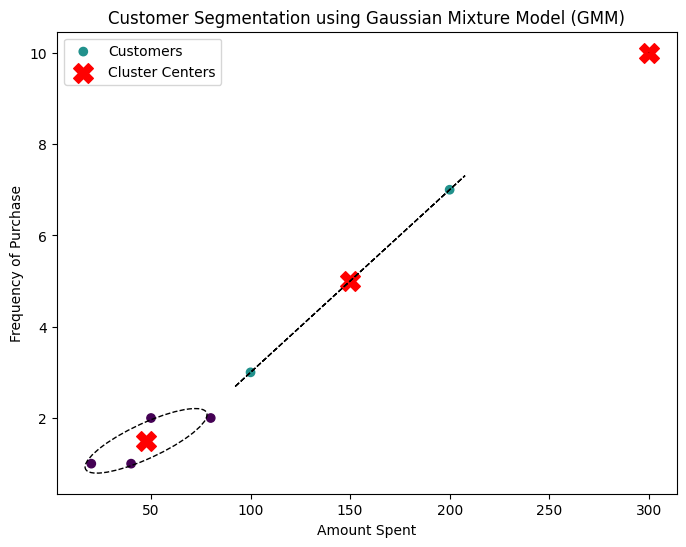

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic customer data (2 features: amount spent, frequency of purchase)
X = np.array([
    [100, 3],   # High spender, frequent buyer
    [50, 2],    # Medium spender, occasional buyer
    [150, 5],   # High spender, very frequent buyer
    [20, 1],    # Low spender, occasional buyer
    [200, 7],   # High spender, very frequent buyer
    [80, 2],    # Medium spender, occasional buyer
    [300, 10],  # Very high spender, very frequent buyer
    [40, 1]     # Low spender, rare buyer
])

# Step 2: Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3)  # Assume 3 clusters (low, medium, high spenders)
gmm.fit(X)

# Step 3: Predict the cluster for each customer
labels = gmm.predict(X)

# Step 4: Plot the data points and the clusters
plt.figure(figsize=(8, 6))

# Plot customers with their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label="Customers")

# Plot the centers of the clusters (Gaussian means)
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Cluster Centers")

# Plot the covariance ellipses representing the shape of each cluster
ax = plt.gca()
for i in range(len(centers)):
    v, w = np.linalg.eigh(gmm.covariances_[i])
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scaling for ellipse size
    u = w[0] / np.linalg.norm(w[0])  # Principal eigenvector (ellipse direction)
    
    angle = np.arctan(u[1] / u[0])  # Angle of the ellipse
    angle = 180.0 * angle / np.pi  # Convert to degrees
    angle = angle % 360

    from matplotlib.patches import Ellipse
    ellipse = Ellipse(xy=centers[i], width=v[0], height=v[1], angle=angle, color='black', fill=False, linestyle='--')
    ax.add_patch(ellipse)

plt.title("Customer Segmentation using Gaussian Mixture Model (GMM)")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency of Purchase")
plt.legend()
plt.show()


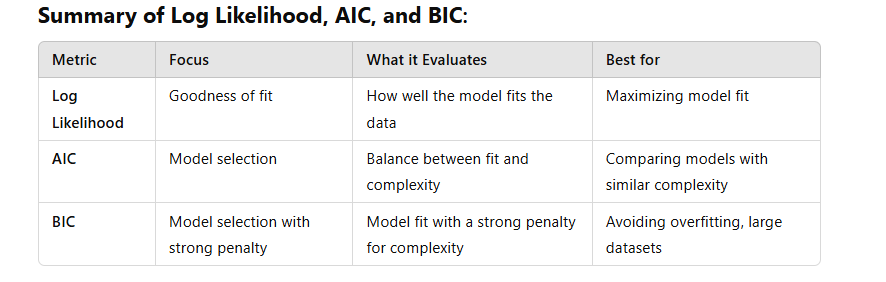